<img src="https://courseseeker.edu.au/assets/images/institutions/3016.png" width="200">
<div>Rusan Vaidya, 248864000</div>
<div>Statistical Thinking for Data Science</div>
<div>TD School</div>
<div>University of Technology Sydney</div


**Problem Statement :**

The telecommunication company seeks assistance in gaining a comprehensive understanding of their customers and identifying the customer segments that display the highest responsiveness to marketing campaigns. The response variable, subscribed, indicates whether the client subscribed to a new plan, which was the objective of the campaign.

In [1]:
from google.colab.drive import mount, flush_and_unmount

flush_and_unmount()
mount('/content/gdrive/')
%cd /content/gdrive/MyDrive/sem2/

Drive not mounted, so nothing to flush and unmount.
Mounted at /content/gdrive/
/content/gdrive/MyDrive/sem2




## Importing pandas and Loading Data

To begin our data analysis process, we start by importing the `pandas` library and loading our dataset from a CSV file.

In [128]:
import pandas as pd
from io import StringIO

file = 'Statistical Thinking for Data Science/TeleCom_Data-2.csv'

# Reading the content of the CSV file
with open(file, 'r') as file:
    lines = file.readlines()

# Removing the quotes
lines = [line.replace('"', '') for line in lines]

# Create a DataFrame
df = pd.read_csv(StringIO('\n'.join(lines)), sep=';')
df.shape

(41180, 21)

In [129]:
# To display all columns in DataFrame
pd.set_option('display.max_columns', None)

# Display the DataFrame
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,198,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,59,admin.,married,professional.course,no,no,no,telephone,may,mon,139,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,217,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


**Overview of data**

checking if the data types are correct or not and if there is any missing value/ Null values in the

In [24]:
df.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [25]:
# view column data types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41180 entries, 0 to 41179
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41180 non-null  int64  
 1   job             41180 non-null  object 
 2   marital         41180 non-null  object 
 3   education       41180 non-null  object 
 4   default         41180 non-null  object 
 5   housing         41180 non-null  object 
 6   loan            41180 non-null  object 
 7   contact         41180 non-null  object 
 8   month           41180 non-null  object 
 9   day_of_week     41180 non-null  object 
 10  duration        41180 non-null  int64  
 11  campaign        41180 non-null  int64  
 12  pdays           41180 non-null  int64  
 13  previous        41180 non-null  int64  
 14  poutcome        41180 non-null  object 
 15  emp.var.rate    41180 non-null  float64
 16  cons.price.idx  41180 non-null  float64
 17  cons.conf.idx   41180 non-null 

In [26]:
# summary statistics of the numeric cols
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41180.000000,41180.000000,41180.000000,41180.000000,41180.000000,41180.000000,41180.000000,41180.000000,41180.000000,41180.000000
mean,40.021710,258.280427,2.567800,962.516707,0.172705,0.081901,93.575508,-40.501999,3.621422,5167.053344
std,10.419593,259.299856,2.770225,186.809028,0.493719,1.571037,0.578762,4.627358,1.734385,72.230334
min,17.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.000000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.000000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.000000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


# Exploratory Data Analysis

Here, we now explore the data and analyze the data what is the pattern of the data.

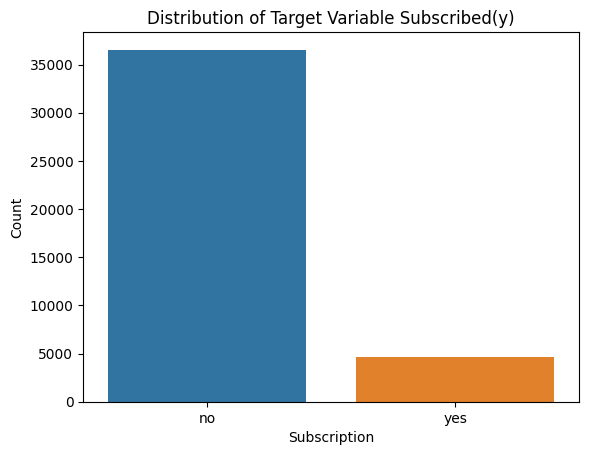

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.countplot(x='y', data=df)
plt.title('Distribution of Target Variable Subscribed(y)')
plt.xlabel('Subscription')
plt.ylabel('Count')
plt.show()

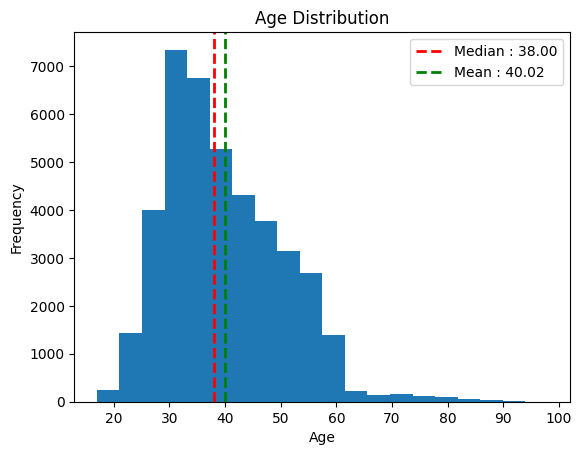

In [28]:
# Histogram for age
plt.hist(df['age'], bins=20)

# Calculate and plot the median
median = np.median(df['age'])
plt.axvline(median, color='red', linestyle='--', linewidth=2, label='Median : %.2f' % median)

# Calculate and plot the mean
mean = np.mean(df['age'])
plt.axvline(mean, color='green', linestyle='--', linewidth=2, label='Mean : %.2f'% mean)

plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.legend()
plt.show()

The age distribution is slightly right-skewed, indicating that while a majority of individuals fall within the 30-40 age range, there's a gradual decline in frequency as age increases, with fewer individuals in the older age brackets. The proximity of the mean and median suggests that age-related outliers or extreme values aren't significantly skewing the overall distribution.

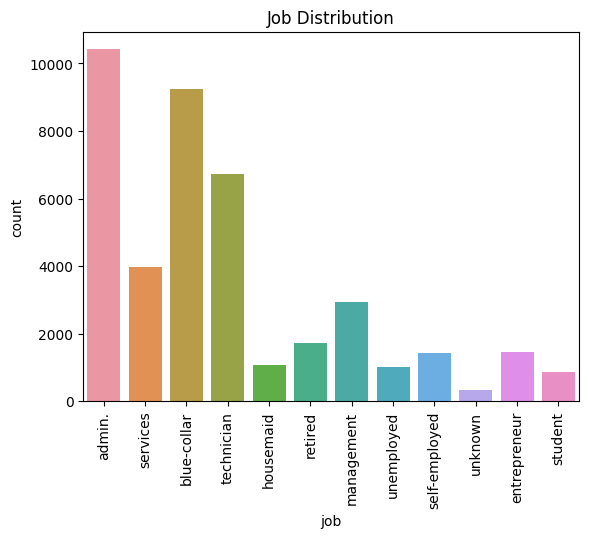

In [29]:
import seaborn as sns

# Bar Plot for job
sns.countplot(data=df, x='job')
plt.title('Job Distribution')
plt.xticks(rotation='vertical')
plt.show()

The 'admin.' job category is the most predominant in the dataset, followed by 'services' and 'blue-collar' roles. Fewer individuals are classified as 'retired' or 'students', and there's a minimal count of 'unknown' job types, suggesting a comprehensive dataset regarding job categorization.

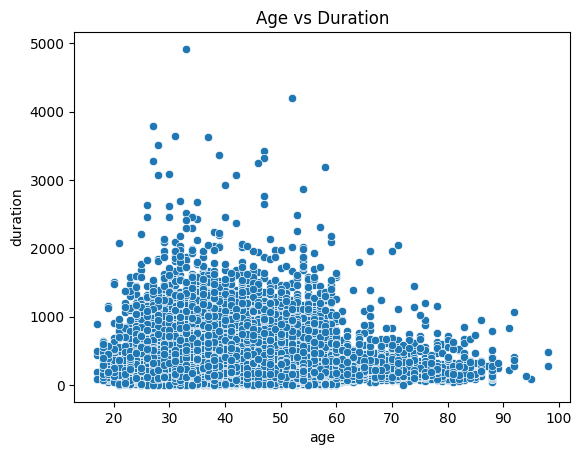

In [30]:
# Scatter plot for age vs duration
sns.scatterplot(data=df, x='age', y='duration')
plt.title('Age vs Duration')

plt.show()

The graph predominantly showcases that regardless of age, most individuals tend to have shorter durations, as evidenced by the dense cluster of points at the lower duration values. Interestingly, as age surpasses 70, there's a notable decrease in long durations, implying a potential inverse relationship between age and duration in the upper age bracket. However, scattered data points at higher durations across various age groups suggest occasional outliers or unique instances that deviate from the primary trend.

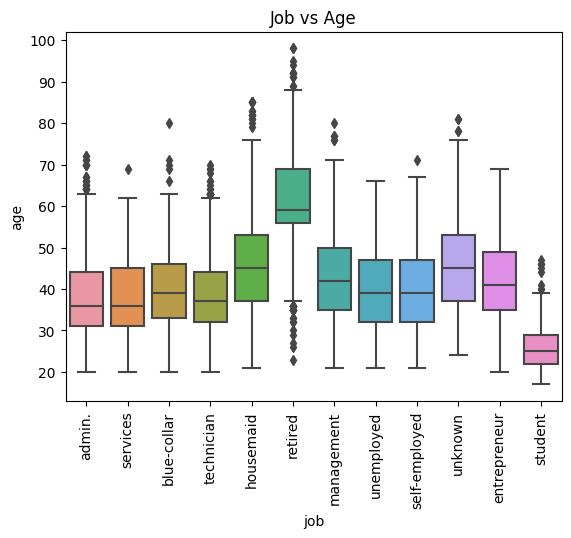

In [31]:
# Box-plot for job vs age
sns.boxplot(data=df, x='job', y='age')
plt.title('Job vs Age')
plt.xticks(rotation = 'vertical')
plt.show()

The boxplot "Job vs Age" reveals 'retired' and 'housemaid' roles skewing older, while 'student' roles are predominantly younger. Broad age diversity is observed in 'housemaid', 'technician', and 'management' roles.

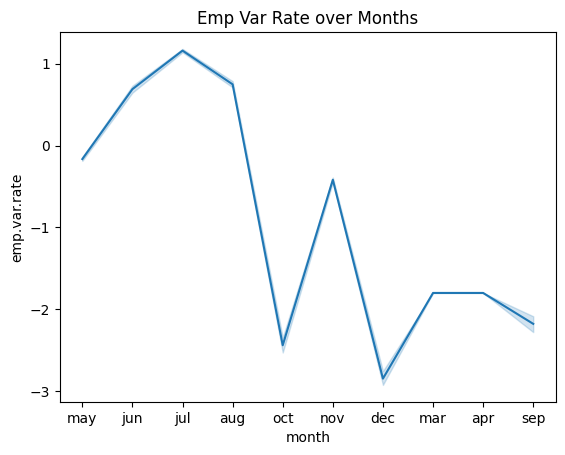

In [32]:
# Plot the sorted dataframe
sns.lineplot(data=df, x='month', y='emp.var.rate')
plt.title('Emp Var Rate over Months')
plt.show()

The "Emp Var Rate over Months" graph shows a peak in July, indicating a high employment variation rate. Post-August, there's a sharp decline, stabilizing towards the year-end.

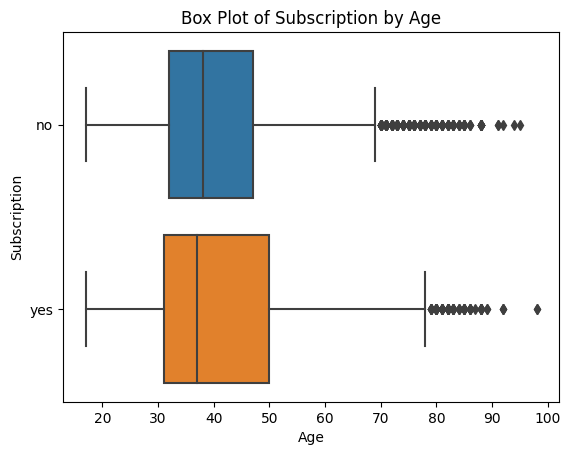

In [33]:
import seaborn as sns

# Box plot to see relation between subscription and age
sns.boxplot(x='age', y='y', data=df)
plt.title(f'Box Plot of Subscription by Age')
plt.xlabel('Age')
plt.ylabel('Subscription')
plt.show()

From the provided box plot analysis, it's evident that both subscribers and non-subscribers have a similar interquartile range (IQR) for age, spanning roughly from 30 to 50 years. Interestingly, subscribers tend to have a median age slightly lower than non-subscribers. While non-subscribers' upper whisker reaches 70 years, it extends to 80 years for subscribers. There are also outliers present, with certain clients as old as 100 subscribing to the telecommunication plan. This observation suggests that age alone might not be a reliable predictor for subscription outcomes.

<Figure size 1000x600 with 0 Axes>

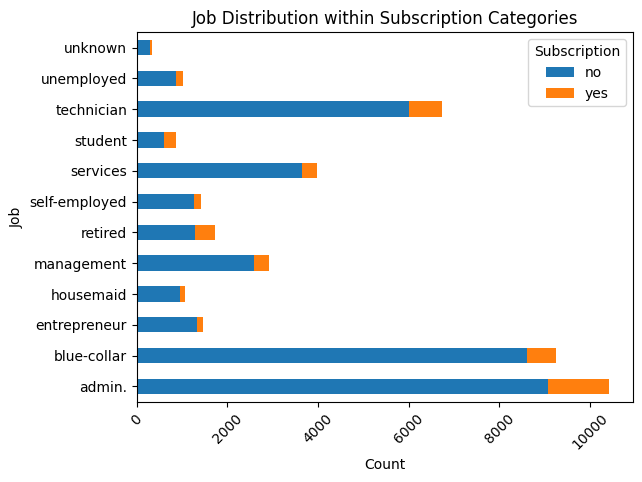

In [34]:
job_subscriber_crosstab = pd.crosstab(df['job'], df['y'], )

# Plot the stacked bar plot to see relation between age and job
plt.figure(figsize=(10, 6))
job_subscriber_crosstab.plot(kind='barh', stacked=True)
plt.title('Job Distribution within Subscription Categories')
plt.xlabel('Count')
plt.ylabel('Job')
plt.xticks(rotation=45)
plt.legend(title='Subscription')
plt.show()

From the above stacked bar graph we can observe that admins have relatively higher number of subscribers compared to other jobs. Jobs like Enterprenuers, technician, management, housemaid, students and clients who are retired show similar trends as adimn. So, there marketing strategies should be applied by targeting these clients.

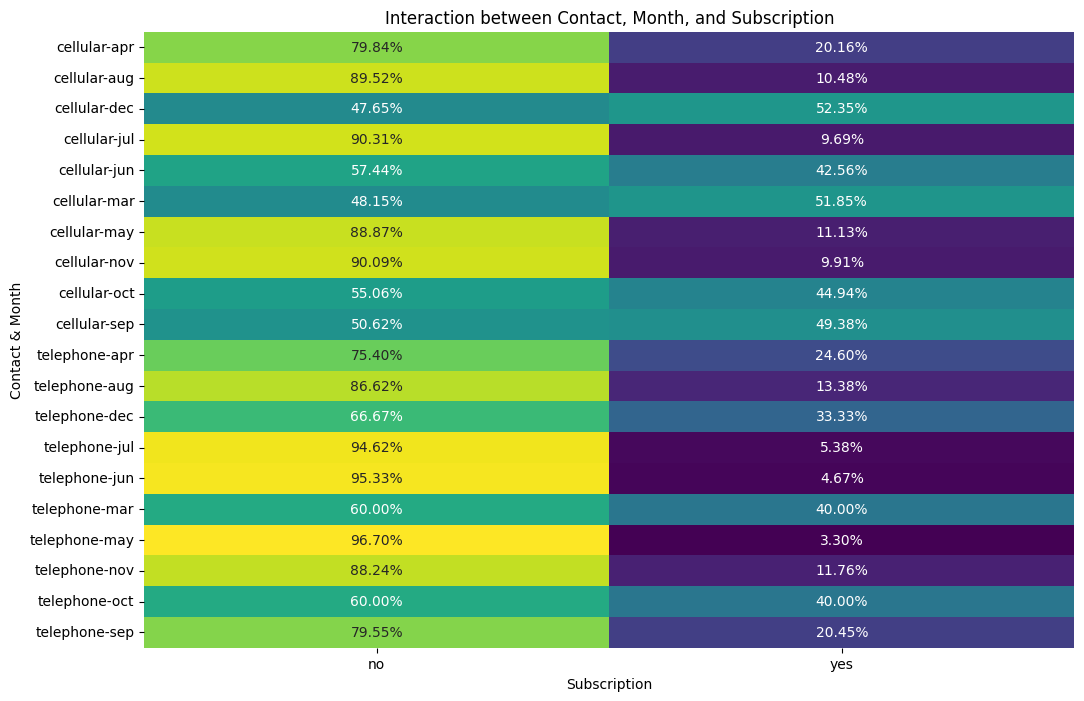

In [35]:
contact_month_subscriber_crosstab = pd.crosstab([df['contact'], df['month']], df['y'], normalize='index')

# Plot the heatmap to observe relation between contact, month and subscription
plt.figure(figsize=(12, 8))
sns.heatmap(contact_month_subscriber_crosstab, annot=True, cmap='viridis', fmt='.2%', cbar=False)
plt.title('Interaction between Contact, Month, and Subscription')
plt.xlabel('Subscription')
plt.ylabel('Contact & Month')
plt.show()

For cellular contact, months like December, March, and October demonstrate relatively balanced subscription outcomes, while in August, July, and November, the majority of clients have no subscriptions. Similarly, for telephone contact, December, March, and October show balanced subscription outcomes, but in May, June, and July, most clients lack subscriptions. These balanced subscription months may represent optimal times to implement marketing strategies to attract more subscribers.

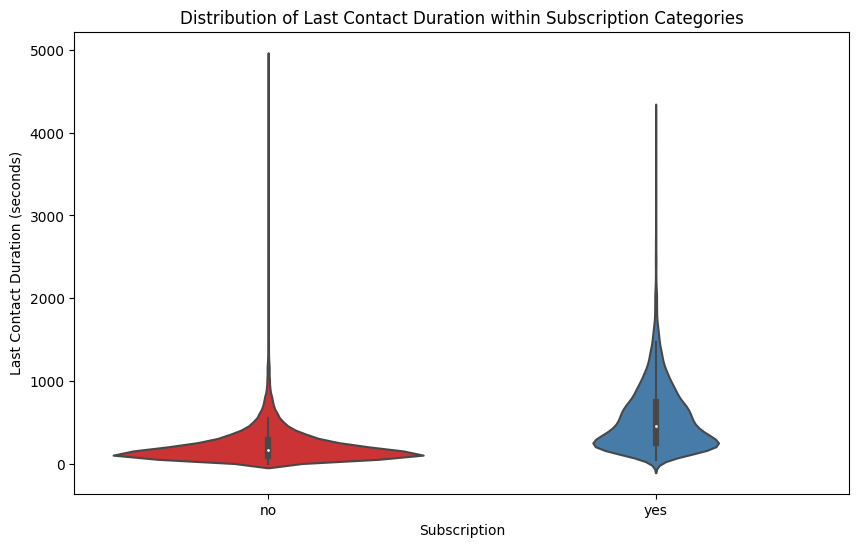

In [36]:
# violon plot to understand contact duration and subscription
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='y', y='duration', palette='Set1')
plt.title('Distribution of Last Contact Duration within Subscription Categories')
plt.xlabel('Subscription')
plt.ylabel('Last Contact Duration (seconds)')
plt.show()

Both subscription groups primarily have shorter interaction times. The "no" group displays a broader range of short contacts, while the "yes" group presents a noticeable peak, suggesting an ideal duration for achieving positive subscriptions.

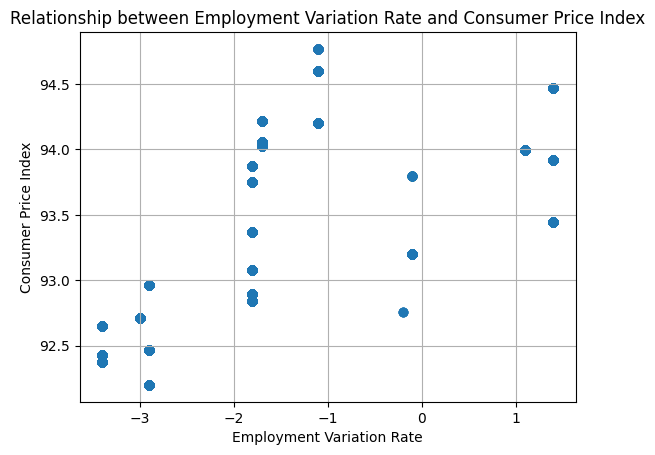

In [37]:
plt.scatter(df['emp.var.rate'], df['cons.price.idx'], alpha=0.5)
plt.title('Relationship between Employment Variation Rate and Consumer Price Index')
plt.xlabel('Employment Variation Rate')
plt.ylabel('Consumer Price Index')
plt.grid(True)
plt.show()

From the scatterplot above we can observe that lower employment variation rate are associated with lower consumer price index and positive employment rate is linked with higher consumer price index.

y               no   yes
poutcome                
failure       3645   605
nonexistent  32418  3141
success        479   892


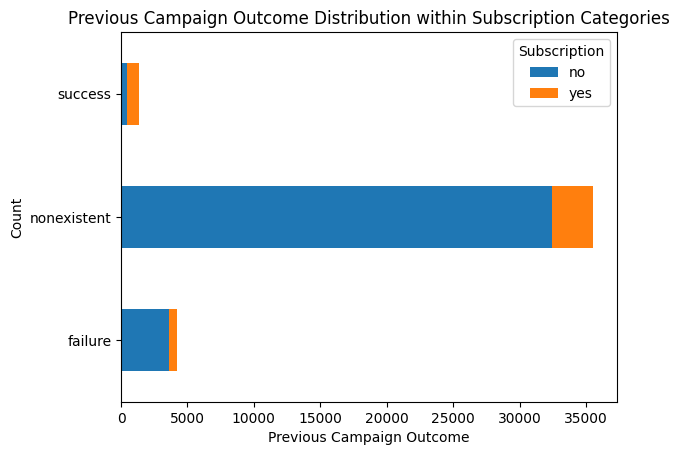

In [38]:
previous_outcome_subscriber_crosstab = pd.crosstab(df['poutcome'], df['y'])
print(previous_outcome_subscriber_crosstab)
previous_outcome_subscriber_crosstab.plot(kind='barh', stacked=True)
plt.title('Previous Campaign Outcome Distribution within Subscription Categories')
plt.xlabel('Previous Campaign Outcome')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Subscription')
plt.show()

From the above stacked bar graph we can observe that most of the subscribers had non existenct previous campaign and the number of successful subscribers are more than that of failure.

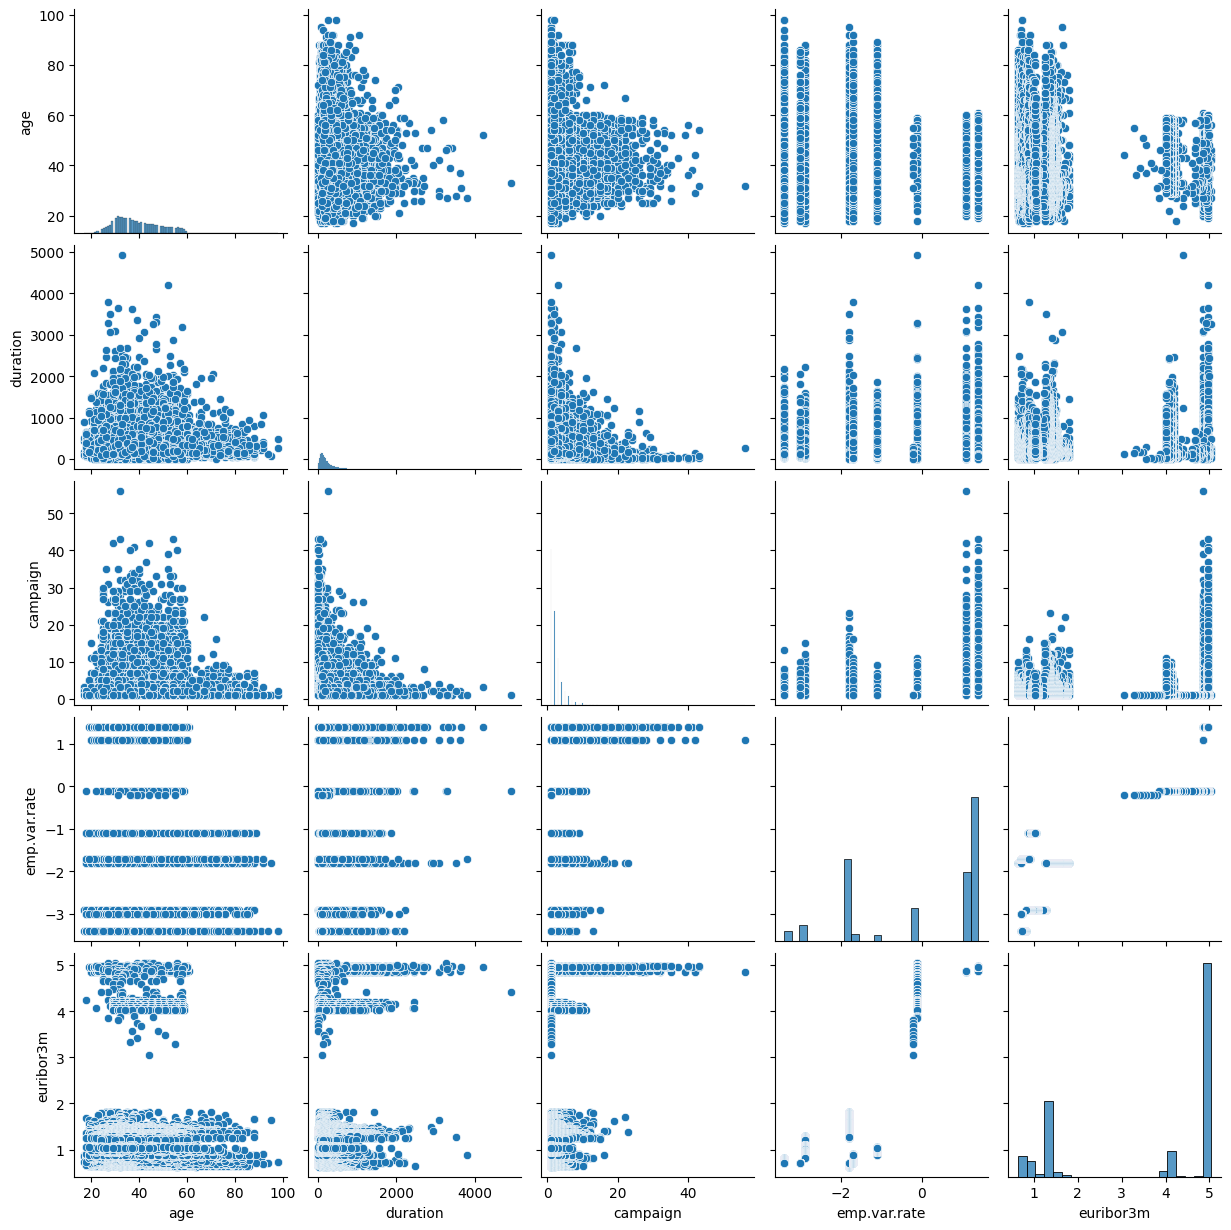

In [39]:
# Pair-Plot for selected numerical variables
sns.pairplot(df[['age', 'duration', 'campaign', 'emp.var.rate', 'euribor3m']])
plt.show()

<ipython-input-40-4e0ef23a99d1>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


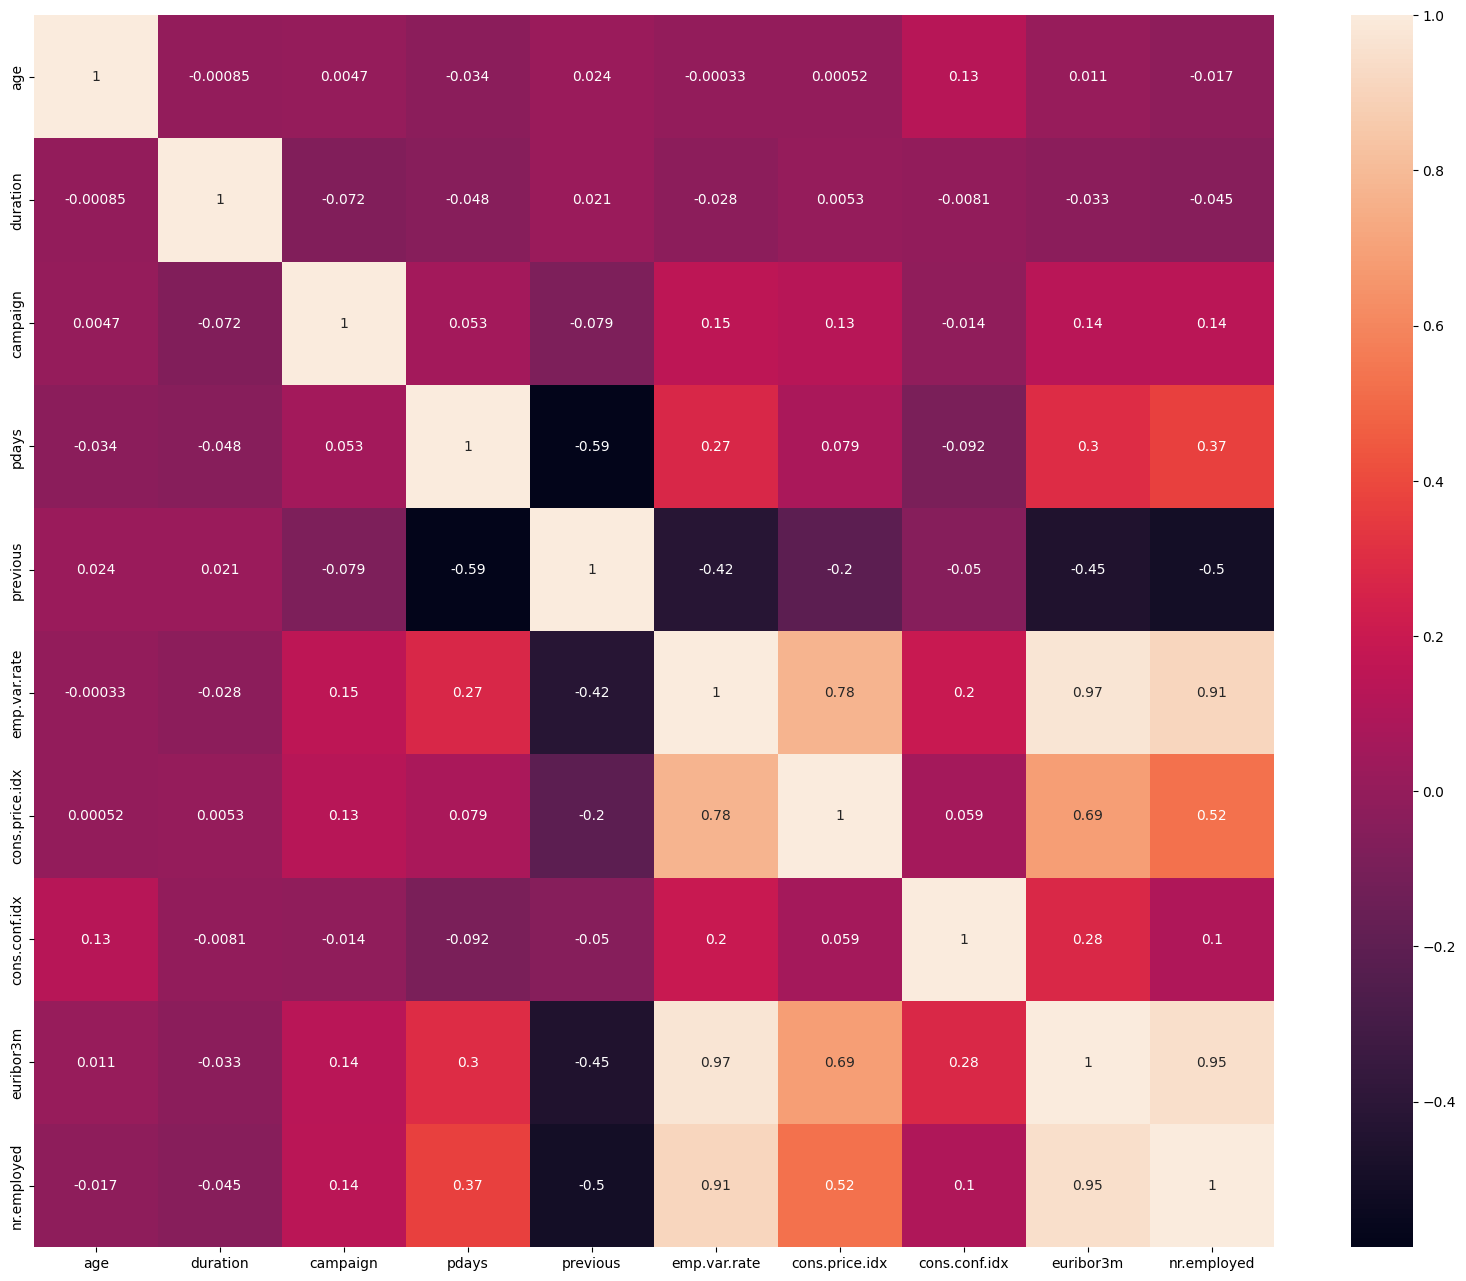

In [40]:
# Correlation Heatmap
corr_matrix = df.corr()
plt.figure(figsize=(20, 16))
sns.heatmap(corr_matrix, annot=True)
plt.show()

In [130]:
from scipy.stats import chi2_contingency
import statsmodels.api as sm

# Define significance level
alpha = 0.05

# Chi-square test for categorical variables
for col in ['job', 'marital', 'education']:
    contingency = pd.crosstab(df[col], df['y'])
    chi2, p_value, _, _ = chi2_contingency(contingency)
    print(f"\n{col.upper()} vs CAMPAIGN SUCCESS:")
    print(f"P-value: {p_value}")
    if p_value < alpha:
        print(f"The relationship between {col} and subscription is statistically significant, rejecting the null hypothesis.")
    else:
        print(f"There is no significant relationship between {col} and subscription, failing to reject the null hypothesis.")


JOB vs CAMPAIGN SUCCESS:
P-value: 9.842278329355203e-199
The relationship between job and subscription is statistically significant, rejecting the null hypothesis.

MARITAL vs CAMPAIGN SUCCESS:
P-value: 1.7975340906803586e-26
The relationship between marital and subscription is statistically significant, rejecting the null hypothesis.

EDUCATION vs CAMPAIGN SUCCESS:
P-value: 4.1099278003902133e-38
The relationship between education and subscription is statistically significant, rejecting the null hypothesis.


In [132]:
import statsmodels.api as sm

X_ = df['cons.conf.idx']
y_ = df['y'].apply(lambda x: 1 if x == 'yes' else 0)
X_ = sm.add_constant(X_)  # Adds a constant term to the predictor

model = sm.Logit(y_, X_)
result = model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.350468
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                41180
Model:                          Logit   Df Residuals:                    41178
Method:                           MLE   Df Model:                            1
Date:                Sun, 05 Nov 2023   Pseudo R-squ.:                0.004279
Time:                        12:15:22   Log-Likelihood:                -14432.
converged:                       True   LL-Null:                       -14494.
Covariance Type:            nonrobust   LLR p-value:                 8.250e-29
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.5719      0.133     -4.287      0.000      -0.833      -0.310
cons.conf.idx     0.

In [110]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

# Assuming df is your dataframe
X = df.drop('y', axis=1)
y = df['y']

# One Hot Encoding
categorical_features = X.select_dtypes(include=['object']).columns
one_hot_encoder = OneHotEncoder(sparse=False, drop='first')
one_hot_encoded = pd.DataFrame(one_hot_encoder.fit_transform(X[categorical_features]), columns=one_hot_encoder.get_feature_names_out(categorical_features))

# Concatenating with the original dataframe
X = pd.concat([X, one_hot_encoded], axis=1)
X = X.drop(categorical_features, axis=1)

# Applying SMOTE on training data
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)

# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)


In [113]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Define logistic regression model
log_reg = LogisticRegression()

# Define hyperparameter grid
param_grid = {
    'C': np.logspace(-4, 4, 10),
}

# Setup GridSearchCV
grid_search_lr = GridSearchCV(log_reg, param_grid, cv=5, scoring='accuracy', verbose=1)

# Fit model
grid_search_lr.fit(X_train, y_train)

# Display best parameters
print("Best Parameters: ", grid_search_lr.best_params_)
print("Best Score: ", grid_search_lr.best_score_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Parameters:  {'C': 21.54434690031882}
Best Score:  0.870371318006234


In [114]:
from sklearn.metrics import classification_report

y_pred_lr = grid_search_lr.predict(X_test)
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.88      0.85      0.86      7330
           1       0.86      0.88      0.87      7287

    accuracy                           0.87     14617
   macro avg       0.87      0.87      0.87     14617
weighted avg       0.87      0.87      0.87     14617



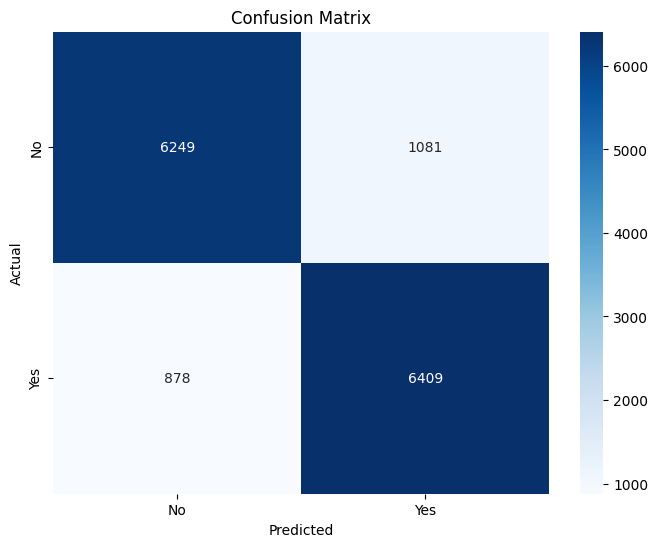

In [115]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_lr)

# Plotting the Confusion Matrix using a Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Best Parameters: {'criterion': 'entropy', 'max_depth': None}
Classification Report:
               precision    recall  f1-score   support

          no       0.94      0.93      0.94      7330
         yes       0.93      0.94      0.93      7287

    accuracy                           0.94     14617
   macro avg       0.94      0.94      0.94     14617
weighted avg       0.94      0.94      0.94     14617



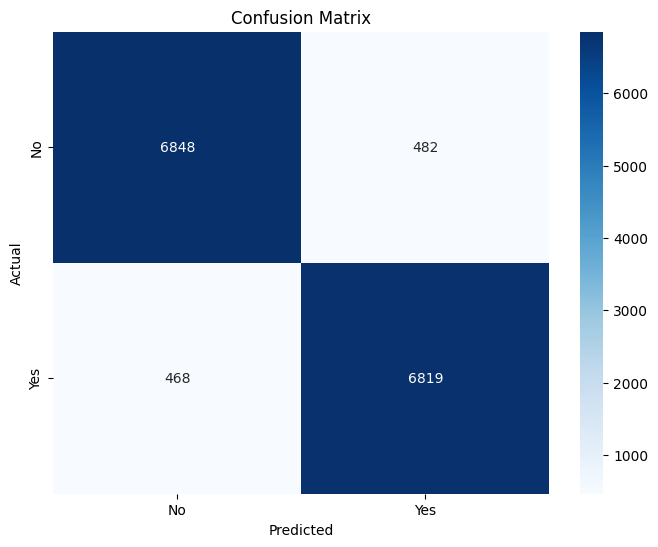

In [81]:
from sklearn.tree import DecisionTreeClassifier

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
}

dt = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Best Parameters
print("Best Parameters:", grid_search.best_params_)

# Prediction and Evaluation
y_pred = grid_search.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plotting the Confusion Matrix using a Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
y_test = y_test.apply(lambda x: 1 if x == 'yes' else 0)

y_score_rf = grid_search.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_score_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

In [ ]:
plt.plot(fpr_rf, tpr_rf, color='green', lw=2, label='Random Forest (AUC = {:.2f})'.format(roc_auc_rf))
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

In [85]:
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20]
}

rf = RandomForestClassifier()
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Best Parameters
print("Best Parameters:", grid_search.best_params_)

# Prediction and Evaluation
y_pred = grid_search.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))

Best Parameters: {'criterion': 'entropy', 'max_depth': None}
Classification Report:
               precision    recall  f1-score   support

          no       0.94      0.96      0.95      7330
         yes       0.96      0.94      0.95      7287

    accuracy                           0.95     14617
   macro avg       0.95      0.95      0.95     14617
weighted avg       0.95      0.95      0.95     14617



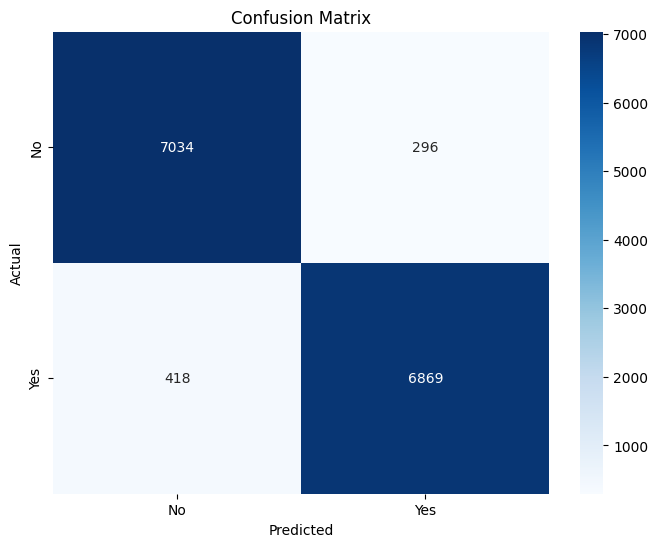

In [86]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plotting the Confusion Matrix using a Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from sklearn.metrics import roc_curve, auc

y_test = y_test.apply(lambda x: 1 if x == 'yes' else 0)

y_score_rf = grid_search.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_score_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

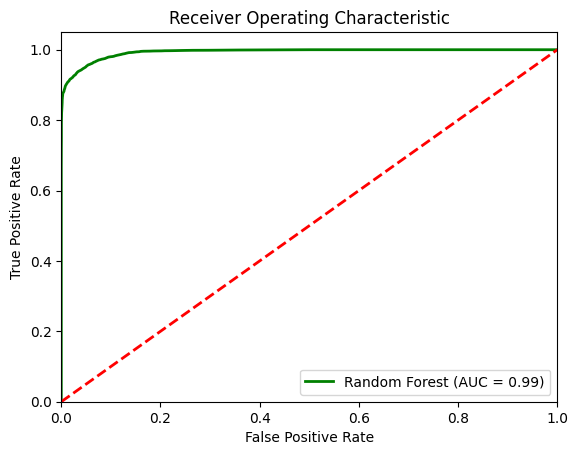

In [106]:
plt.plot(fpr_rf, tpr_rf, color='green', lw=2, label='Random Forest (AUC = {:.2f})'.format(roc_auc_rf))
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()